In [4]:
import itertools
import numpy as np
import os
import seaborn as sns
from tqdm import tqdm
from dataclasses import asdict, dataclass, field
import vsketch
import shapely.geometry as sg
from shapely.geometry import box, MultiLineString, Point, MultiPoint, Polygon, MultiPolygon, LineString
import shapely.affinity as sa
import shapely.ops as so
import matplotlib.pyplot as plt
import pandas as pd

import vpype_cli
from typing import List, Generic
from genpen import genpen as gp, utils as utils
from scipy import stats as ss
import geopandas
from shapely.errors import TopologicalError
import functools
%load_ext autoreload
%autoreload 2

# Try 1

In [ ]:
page_x_inches: float = 17. # inches
page_y_inches: float = 11 # inches
border:float = 20.

buffer_style = 2

In [ ]:
px = utils.DistanceConverter(page_x_inches, 'inches').mm
py = utils.DistanceConverter(page_y_inches, 'inches').mm
page_format = f'{px}mmx{py}mm'
drawbox = sg.box(border, border, px-border, py-border)

xmin, ymin, xmax, ymax = drawbox.bounds


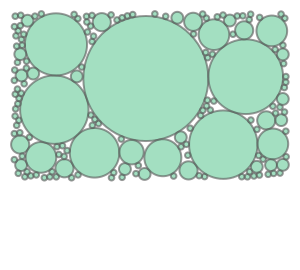

In [ ]:
all_circles = []
circle_to_fill = drawbox
# init
fc_rad = gp.get_rad(circle_to_fill)
x = circle_to_fill.centroid.x
rad_mults = (0.45, 0.02)
rads = np.linspace(fc_rad*rad_mults[0], fc_rad*rad_mults[1], 20)
circles = gp.circle_pack_within_poly(circle_to_fill, rads, progress_bar=False)
all_circles += list(circles)
circle_to_fill.filled = True
not_yet_filled = [c for c in all_circles if not getattr(c, 'filled', False)]
areas = np.array([c.area for c in not_yet_filled])
areas = areas/areas.sum()

circles

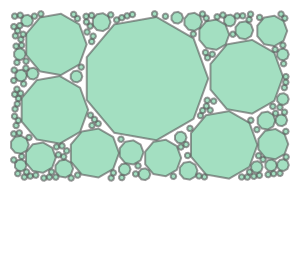

In [ ]:
all_polys = []
polys = [gp.RegPolygon(point=c.centroid, radius=gp.get_rad(c), n_corners=9, rotation=0).poly for c in circles]
poly_to_fill = np.random.choice(not_yet_filled, p=areas)
all_polys += list(polys)
MultiPolygon(polys)

In [ ]:
min_rad = 1
iter_max = 10
rad_mults = (0.7, 0.06)

total iters = 10
total fails = 0


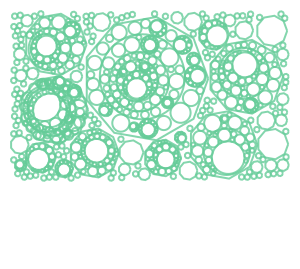

In [ ]:
n_fails = 0
n_iters = 0
pbar = tqdm(total=iter_max)
while (n_fails < 20) and (n_iters < iter_max):
    try:
#         pbar.update()
        n_iters += 1
        fc_rad = gp.get_rad(poly_to_fill)
        
        rads = np.linspace(fc_rad*rad_mults[0], fc_rad*rad_mults[1], 80)
        rads[rads<min_rad] = min_rad
        polys = gp.circle_pack_within_poly(poly_to_fill, rads, progress_bar=False)
        poly_to_fill.filled = True
        all_polys += list(polys)
        not_yet_filled = [c for c in all_polys if not getattr(c, 'filled', False)]
        areas = np.array([c.area for c in not_yet_filled])
        areas = areas/areas.sum()
        poly_to_fill = np.random.choice(not_yet_filled, p=areas)
        n_fails = 0
    except:
        n_fails += 1
        poly_to_fill = np.random.choice(not_yet_filled, p=areas)
        
print(f'total iters = {n_iters}')
print(f'total fails = {n_fails}')
MultiPolygon(all_polys).boundary

In [3]:
all_polys = [gp.RegPolygon(point=p.centroid, radius=gp.get_rad(p), n_corners=3, rotation=0).poly.buffer(1) for p in all_polys]

NameError: name 'all_polys' is not defined

In [ ]:
sk = vsketch.Vsketch()
sk.size(page_format)

sk.scale('1mm')
sk.stroke(1)
sk.geometry(layer)
sk.display(color_mode='none')

<?xml version="1.0" encoding="utf-8" ?>
 
 
 
 
 image/svg+xml 
 
 2022-01-12T16:33:32.094520 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 

# Try 1

In [5]:
page_x_inches: float = 14. # inches
page_y_inches: float = 11 # inches
border:float = 20.

buffer_style = 2

In [6]:
px = utils.DistanceConverter(page_x_inches, 'inches').mm
py = utils.DistanceConverter(page_y_inches, 'inches').mm
page_format = f'{px}mmx{py}mm'
drawbox = sg.box(border, border, px-border, py-border)

xmin, ymin, xmax, ymax = drawbox.bounds


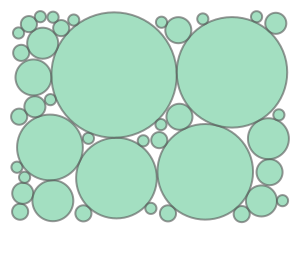

In [7]:
all_circles = []
circle_to_fill = drawbox
# init
fc_rad = gp.get_rad(circle_to_fill)
x = circle_to_fill.centroid.x
rad_mults = (0.45, 0.04)
rads = np.linspace(fc_rad*rad_mults[0], fc_rad*rad_mults[1], 24)
circles = gp.circle_pack_within_poly(circle_to_fill, rads, progress_bar=False)
all_circles += list(circles)
circle_to_fill.filled = True
not_yet_filled = [c for c in all_circles if not getattr(c, 'filled', False)]
areas = np.array([c.area for c in not_yet_filled])
areas = areas/areas.sum()
circle_to_fill = np.random.choice(not_yet_filled, p=areas)
circles

In [8]:
min_rad = 1
iter_max = 10
rad_mults = (0.7, 0.06)

In [15]:
n_fails = 0
n_iters = 0
pbar = tqdm(total=iter_max)
while (n_fails < 20) and (n_iters < iter_max):
    try:
#         pbar.update()
        n_iters += 1
        fc_rad = gp.get_rad(circle_to_fill)
        
        rads = np.linspace(fc_rad*rad_mults[0], fc_rad*rad_mults[1], 80)
        rads[rads<min_rad] = min_rad
        circles = gp.circle_pack_within_poly(circle_to_fill, rads, progress_bar=False)
        circle_to_fill.filled = True
        all_circles += list(circles)
        not_yet_filled = [c for c in all_circles if not getattr(c, 'filled', False)]
        areas = np.array([c.area for c in not_yet_filled])
        areas = areas/areas.sum()
        circle_to_fill = np.random.choice(not_yet_filled, p=areas)
        n_fails = 0
    except:
        n_fails += 1
        circle_to_fill = np.random.choice(not_yet_filled, p=areas)
        
print(f'total iters = {n_iters}')
print(f'total fails = {n_fails}')
MultiPolygon(all_circles).boundary

total iters = 10
total fails = 0


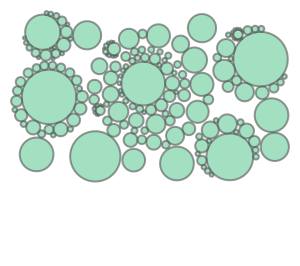

In [7]:
bottom_circles = MultiPolygon([c for c in all_circles if not getattr(c, 'filled', False)])
bottom_circles

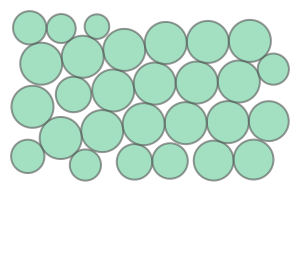

In [8]:
all_circles = []
circle_to_fill = drawbox
# init
fc_rad = gp.get_rad(circle_to_fill)
x = circle_to_fill.centroid.x
rad_mults = (0.15, 0.08)
rads = np.linspace(fc_rad*rad_mults[0], fc_rad*rad_mults[1], 10)
circles = gp.circle_pack_within_poly(circle_to_fill, rads, progress_bar=False)
all_circles += list(circles)
circle_to_fill.filled = True
not_yet_filled = [c for c in all_circles if not getattr(c, 'filled', False)]
areas = np.array([c.area for c in not_yet_filled])
areas = areas/areas.sum()
circle_to_fill = np.random.choice(not_yet_filled, p=areas)
circles

In [9]:
min_rad = 1
iter_max = 5
rad_mults = (0.25, 0.25)

  0%|          | 0/10 [00:24<?, ?it/s]

total iters = 5
total fails = 0


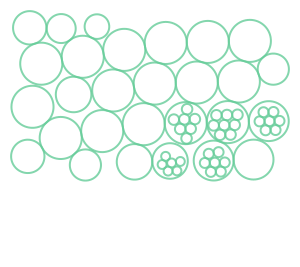

In [10]:
n_fails = 0
n_iters = 0
pbar = tqdm(total=iter_max)
while (n_fails < 20) and (n_iters < iter_max):
    try:
#         pbar.update()
        n_iters += 1
        fc_rad = gp.get_rad(circle_to_fill)
        
        rads = np.linspace(fc_rad*rad_mults[0], fc_rad*rad_mults[1], 80)
        rads[rads<min_rad] = min_rad
        circles = gp.circle_pack_within_poly(circle_to_fill, rads, progress_bar=False)
        circle_to_fill.filled = True
        all_circles += list(circles)
        not_yet_filled = [c for c in all_circles if not getattr(c, 'filled', False)]
        areas = np.array([c.area for c in not_yet_filled])
        areas = areas/areas.sum()
        circle_to_fill = np.random.choice(not_yet_filled, p=areas)
        n_fails = 0
    except:
        n_fails += 1
        circle_to_fill = np.random.choice(not_yet_filled, p=areas)
        
print(f'total iters = {n_iters}')
print(f'total fails = {n_fails}')
MultiPolygon(all_circles).boundary

In [11]:
tri_vertices = MultiPoint([c.centroid for c in all_circles if not getattr(c, 'filled', False)])

In [12]:
trils = MultiLineString(so.triangulate(tri_vertices, edges=True))

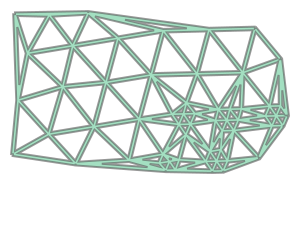

In [13]:
length_filters = np.random.uniform(96, 185, size=len(trils))
tri_buffer = 2.3
ftrils = MultiLineString([l for l, lf in zip(trils, length_filters) if l.length<lf])
tris = ftrils.buffer(tri_buffer, cap_style=2, join_style=3)
tris

In [14]:
stp = gp.ScaleTransPrms(
    d_buffer=-0.3, 
    angles=-60,

)
tri_fill = gp.scale_trans(tris, **stp.prms)

In [15]:
tri_layer = gp.merge_LineStrings([p.boundary for p in tri_fill])

In [16]:
layer = tri_layer.intersection(bottom_circles)

In [17]:
sk = vsketch.Vsketch()
sk.size(page_format)

sk.scale('1mm')
sk.stroke(1)
sk.geometry(layer)
sk.display(color_mode='none')

<?xml version="1.0" encoding="utf-8" ?>
 
 
 
 
 image/svg+xml 
 
 2022-01-12T16:33:32.094520 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 

In [ ]:
savepath = '/mnt/c/code/side/plotter_images/oned_outputs/0108_waka_waka.svg'

sk.save(savepath)

vpype_commands = 'reloop linesimplify --tolerance 0.1mm linemerge --tolerance 0.3mm linesort'
vpype_str = f'vpype read -q 0.05mm {savepath} {vpype_commands} write {savepath}'

os.system(vpype_str)

# try 2